# Introduction
The prerequisites of this course include linear algebra, calculus, complex numbers, and intermediate-level Python. Nevertheless, it is worth gathering some core concepts in a single notebook as a refresher, and also to serve as a reference. The concepts in this notebook will be used over and over again in the course, so 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
π = np.pi

Apart from the imports, we also make some changes for convenience. Staring at the many digits of precision of numpy is irrelevant for most of the course, so we suppress anything beyond three digits. Also, we use π to denote π, which is a lot easier to read than `np.pi`.

# Complex numbers
Using complex numbers in machine learning is rare, but in quantum mechanics, all spaces use complex numbers. The difference is that a complex number has an imaginary component: a part that is a multiple of $i=\sqrt{-1}$. Complex numbers are very much an algebraic construct: technically speaking, they are [algebraically closed](https://en.wikipedia.org/wiki/Fundamental_theorem_of_algebra), whereas the real numbers are not. From our perspective, what matters is that they enable us to model effects like interference. We denote the set of complex numbers by $\mathbb{C}$.

The imaginary number $i$ in Python is denoted by `1j`. We can quickly check that it indeed squares to -1:

In [2]:
1j**2

(-1+0j)

A generic complex number has both real and imaginary parts:

In [3]:
x = 2.3 + 5.1j
print("Type of x:", type(x))
print("Real part of x:", x.real)
print("Imaginary part of x:", x.imag)

Type of x: <class 'complex'>
Real part of x: 2.3
Imaginary part of x: 5.1


You can think of a complex number as a point on the plane. After all, it is described by two real numbers: the actual real part, and the real coefficient that multiplies the imaginary number. We define a simple function to plot complex numbers:

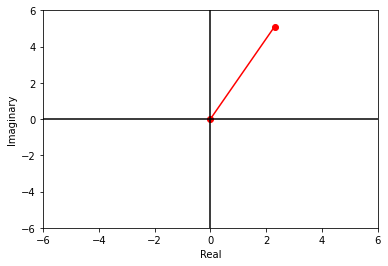

In [4]:
def plot_complex(a):
    for x in range(len(a)):
        plt.plot([0,a[x].real], [0,a[x].imag], 'r-o')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    limit = np.max(np.ceil(np.absolute(a)))
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))    
    plt.show()

plot_complex([x])

The absolute value of a complex numbers is the distance between the point and the origin:

In [5]:
abs(x)

5.594640292279745

In fact, the absolute value $r$ and the angle $\varphi$ with the x axis are also sufficient to describe a complex number. This leads to writing the complex number as $z=re^{i\varphi}$. In quantum mechanics, we often write complex numbers in the exponential form and call the angle $\varphi$ a phase.

In [6]:
r = abs(x)
φ = np.arctan2(x.imag, x.real)
z = r*np.exp(1j*φ)
z == x

True

Complex conjugation flips the sign of the imaginary number, that is, $x=a+bi$ becomes $x^*=a-bi$.

(2.3-5.1j)


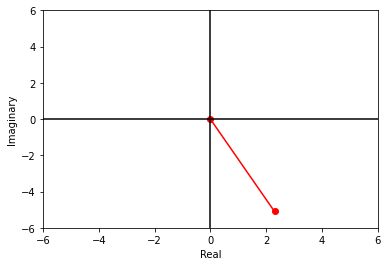

In [7]:
print(x.conjugate())
plot_complex([x.conjugate()])

# Vectors
Linear spaces are ubiquitous in machine learning, and they also provide the foundation to the formalism of quantum mechanics. However, unlike in machine learning and many other disciplines where linear space are common, the vectors are over complex spaces. Here is an example of a two-dimensional complex vector, that is, an element of $\mathbb{C}^2$:

In [8]:
a = np.array([[1+2j], [2+2j]])
a

array([[1.+2.j],
       [2.+2.j]])

By convention, we write vectors as column vectors.

Since a complex number is described by two real numbers, even a two dimensional complex number would require four spatial dimensions if we wanted to plot it. Visual intuition is very limited when we deal even with low-dimensional complex spaces.

We can transpose complex vectors just like real vectors, but it is more interesting to take their conjugate transpose (also called Hermitian transpose or adjoint), which is a transposition followed by taking the complex conjugate of each element. We will denote the complex conjugation of a vector by $\dagger$. With this, a vector $a=\begin{pmatrix}a_1\\ a_2\end{pmatrix}$ becomes $a^\dagger=\begin{pmatrix}a_1^* & a_2^*\end{pmatrix}$.

In [9]:
a.T.conj()

array([[1.-2.j, 2.-2.j]])

The product of a row vector with a column vector is a scalar, which we call the inner or dot product. In `numpy`, you can use the `.dot` method of an array, or the symbol `@` to calculate the inner product.

In [10]:
b = np.array([[0.1], [2j]])
b.T.conj() @ a

array([[4.1-3.8j]])

It is the inner product that allows us to talk about notions like angle between the vectors, orthogonality, and overlap. For instance, orthogonal vectors have zero overlap:

In [11]:
c = np.array([[1], [0]])
d = np.array([[0], [1]])
c.T.conj() @ d

array([[0]])

The inner product also induces a norm: taking the inner product of the vector with its own conjugate transpose measures its own overlap with itself. In other words, it has something to do with its length. The $l_2$-norm is just the square root of the inner product of the vector with itself:

In [12]:
print("The square of the l2 norm of a:", np.linalg.norm(a)**2)
print("The same thing calculated as an inner product:", a.T.conj() @ a)

The square of the l2 norm of a: 12.999999999999998
The same thing calculated as an inner product: [[13.+0.j]]


Apart from the $l_2$-norm, the $l_0$- and $l_1$-norms are also frequently used. The $l_0$-norm counts the number of nonzero elements of a vector. For instance, by imposing a regularizer on a neural network that adds a penalty in the $l_0$-norm of the weights, we increase sparsity in the network by forcing many entries to zero.

In [13]:
sum(a != 0), sum(c != 0)

(array([2]), array([1]))

The $l_1$-norm is the sum of the absolute values of the elements of the vector:

In [14]:
np.linalg.norm(a, ord=1)

5.06449510224598

As an exercise, it is worth drawing the unit circle in each of these three norms to get a better intuition at the difference between them.

If you are coming from a computer science background, tensor products might take while to get used to. We only work in finite-dimensional spaces, so the tensor product for us is identical to the Kronecker product. For two two-dimensional vectors $a=\begin{pmatrix}a_1\\ a_2\end{pmatrix}$ and $b=\begin{pmatrix}b_1\\ b_2\end{pmatrix}$, it is defined as $a\otimes b=\begin{pmatrix}a_1b_1\\a_1b_2\\a_2b_1\\ a_2b_2\end{pmatrix}$. For instance:

In [15]:
np.kron(c, d)

array([[0],
       [1],
       [0],
       [0]])

This vector is an element of the tensor product of the two spaces where $a$ and $b$ lie, that is, $a\otimes b\in\mathbb{C}^2\otimes\mathbb{C}^2$. Why not just say $\mathbb{C}^4$? The fine tensor product structure of the space is of major importance in quantum computation, as you will see.

# Matrices
Matrices, just like vectors, form linear spaces. The matrices we encounter in quantum computing are complex-valued, just like the vectors. For instance:

In [16]:
A = np.array([[1+2j, 2], [1j, 3+4j]])
A

array([[1.+2.j, 2.+0.j],
       [0.+1.j, 3.+4.j]])

The conjugate transpose works just the same way as for vectors:

In [17]:
A.T.conj()

array([[1.-2.j, 0.-1.j],
       [2.-0.j, 3.-4.j]])

We can apply a matrix to a vector:

In [18]:
A @ a

array([[ 1. +8.j],
       [-4.+15.j]])

We can also construct matrices by vectors. We saw that the inner product is the multiplication of a row vector with a column vector. If we multiply a column vector with a row vector, we get a matrix:

In [19]:
a @ a.T.conj()

array([[5.+0.j, 6.+2.j],
       [6.-2.j, 8.+0.j]])

The eigendecomposition of a matrix gives you its eigenvalues $\lambda$ and the corresponding eigenvectors:

In [20]:
λs, eigenvectors = np.linalg.eig(A)

The eigenvalues of the matrix are also called its spectrum. The spectrum is of central interest in quantum mechanics. For instance, the spectrum of a specific matrix called Hamiltonian gives you the discrete energy levels that the quantum system can take.

Matrices often have some interesting properties. For instance, they can be symmetric, that is, they equal their transpose. Since we work with complex-valued matrices, we are interested in generalizing this to the complex conjugate. If a matrix equals its complex conjugate, it is called Hermitian (or self-adjoint). Hermitian matrices are ubiquitous in quantum mechanics: the Hamiltonian we just referred to is Hermitian, so are density matrices that represent quantum states, and measurements we make on the system. All of these concepts will be introduced in the course. Our example matrix is not Hermitian:

In [21]:
np.all(A == A.T.conj())

False

But the one we obtained from the vector $a$ is:

In [22]:
B = a @ a.T.conj()
np.all(B == B.T.conj())

True

An $n\times n$ Hermitian matrix $M$ is positive semidefinite if the scalar $z^* M z$ is non-negative for every non-zero column vector $z$ of $n$ elements. $M$ is positive semidefinite if and only if all of its eigenvalues are non-negative. For instance, $B$ is positive semidefinite:

In [23]:
np.linalg.eigvals(B)

array([ 0.-0.j, 13.-0.j])

Density matrices and measurement operators are always positive semidefinite matrices.

One last property is the unitary nature. A matrix $U$ is unitary if its inverse is its complex conjugate, that is, $UU^\dagger=U^\dagger U=\mathbb{1}$. For instance, the matrix $\begin{pmatrix} 0 & 1\\1 & 0\end{pmatrix}$ is unitary:

In [24]:
U = np.array([[0, 1], [1, 0]])
print(U @ U.T.conj())
print(U.T.conj() @ U)

[[1 0]
 [0 1]]
[[1 0]
 [0 1]]


As you will see, computation in a perfect quantum computer is described by unitary matrices.

Functions of matrices are usually not trivial to calculate. For instance, a common operation is matrix exponentiation. Given some matrices $M$ and $N$, we are interested in $\exp(MN)$. In general, the product rule does not apply, that is, we cannot say that $\exp(MN)$ equals $\exp(M)\exp(N)$. A common trick is called Trotterization, where $\exp(MN)$ is approximated by some product of operators. The concept is of critical importance in contemporary quantum computers where we use various tricks to run algorithms despite noise and poor coherence times. 

Finally, we can also take tensor products of matrices, just like in the case of vectors:

In [25]:
np.kron(A, B)

array([[ 5.+10.j,  2.+14.j, 10. +0.j, 12. +4.j],
       [10.+10.j,  8.+16.j, 12. -4.j, 16. +0.j],
       [ 0. +5.j, -2. +6.j, 15.+20.j, 10.+30.j],
       [ 2. +6.j,  0. +8.j, 26.+18.j, 24.+32.j]])